<a href="https://colab.research.google.com/github/milenalebe/simulacion/blob/master/Random_Forest_SIMA_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
pd.set_option('display.max.columns', 100)

In [42]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,id,Zones,Crop,Yield,Variety,Management,Plnt Date,Lon,Lat,Area,source,cloud,mtci,gcvi,ndvi,dvi,evi,date,t2m,t2m_max,t2m_min,prectot
0,0.0,10382.0,VI,Maiz,10800.0,NaN,De primera,10/6/2016 0:00,-62.1793,-32.4368,114.0,Sentinel-2,0.0,8.576897,6.639699,0.847529,0.369461,0.623057,1/10/2017,22.76,29.55,16.99,0.14
1,1.0,10382.0,VI,Maiz,10800.0,NaN,De primera,10/6/2016 0:00,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/11/2017,23.60,30.00,16.32,0.00
2,2.0,10382.0,VI,Maiz,10800.0,NaN,De primera,10/6/2016 0:00,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/2017,26.25,30.00,18.14,0.00
3,3.0,10382.0,VI,Maiz,10800.0,NaN,De primera,10/6/2016 0:00,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/13/2017,25.06,30.00,20.32,0.60
4,4.0,10382.0,VI,Maiz,10800.0,NaN,De primera,10/6/2016 0:00,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/14/2017,24.17,30.00,17.68,11.12


## Limpieza de datos

Set de entrenamiento

In [43]:
# Eliminamos columnas innecesarias
df.drop(columns=['Unnamed: 0', 'cloud', 'source', 'dvi', 'Variety'], inplace=True)

In [44]:
# Eliminamos filas completamente nulas 
# df.drop(df.loc[595152:].index, inplace=True)
df.dropna(how='all', inplace=True)

In [45]:
# Poner fechas en formato datetime
df['date'] = pd.to_datetime(df['date'])
df['Plnt Date'] = pd.to_datetime(df['Plnt Date'])

In [46]:
# Ordenar los valores por campo y por fecha c/u para poder rellenar los indices nan
df.sort_values(by=['id','date'], inplace=True)
df.head()

,id,Zones,Crop,Yield,Management,Plnt Date,Lon,Lat,Area,mtci,gcvi,ndvi,evi,date,t2m,t2m_max,t2m_min,prectot
111302,10367.0,VII,Soja,5115.0,De primera,2016-11-07,-62.2210,-36.1245,174.0,9.236102,14.021510,0.950764,0.906766,2017-02-06,17.00,23.56,10.00,0.09
0,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,2017-01-10,22.76,29.55,16.99,0.14
1,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,2017-01-11,23.60,30.00,16.32,0.00
2,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,2017-01-12,26.25,30.00,18.14,0.00
3,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,NaN,NaN,NaN,NaN,2017-01-13,25.06,30.00,20.32,0.60


In [47]:
# Reemplazo de nan por el valor anterior no nulo que encuentra
df_ffill = df.copy()
df_ffill[['mtci','gcvi','ndvi','evi']] = df_ffill[['mtci','gcvi','ndvi','evi']].fillna(method='ffill')

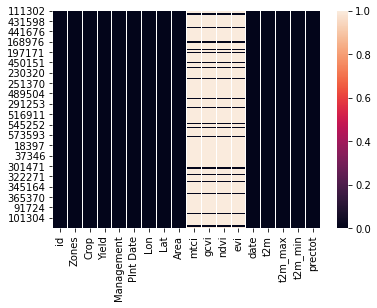

In [52]:
sns.heatmap(df.isnull())

In [49]:
df_ffill.head()

,id,Zones,Crop,Yield,Management,Plnt Date,Lon,Lat,Area,mtci,gcvi,ndvi,evi,date,t2m,t2m_max,t2m_min,prectot
111302,10367.0,VII,Soja,5115.0,De primera,2016-11-07,-62.2210,-36.1245,174.0,9.236102,14.021510,0.950764,0.906766,2017-02-06,17.00,23.56,10.00,0.09
0,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,2017-01-10,22.76,29.55,16.99,0.14
1,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,2017-01-11,23.60,30.00,16.32,0.00
2,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,2017-01-12,26.25,30.00,18.14,0.00
3,10382.0,VI,Maiz,10800.0,De primera,2016-10-06,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,2017-01-13,25.06,30.00,20.32,0.60


In [ ]:
# chequeo de que no hay más nulos
df.isnull().sum()

id            0
Zones         0
Crop          0
Yield         0
Management    0
Plnt Date     0
Lon           0
Lat           0
Area          0
mtci          0
gcvi          0
ndvi          0
evi           0
date          0
t2m           0
t2m_max       0
t2m_min       0
prectot       0
dtype: int64

<AxesSubplot:>

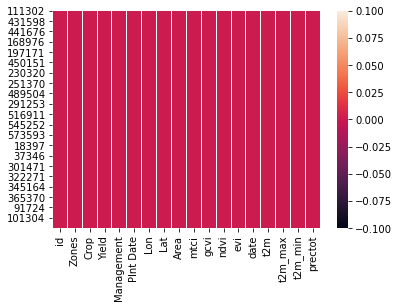

In [ ]:
sns.heatmap(df.isnull())

## Preprocesamiento de variables categóricas

Set de entrenamiento

In [53]:
df_ffill.drop(columns=['Plnt Date', 'date'], inplace=True)

In [54]:
df_ffil = pd.get_dummies(df_ffill)
df_ffill.head()

,id,Zones,Crop,Yield,Management,Lon,Lat,Area,mtci,gcvi,ndvi,evi,t2m,t2m_max,t2m_min,prectot
111302,10367.0,VII,Soja,5115.0,De primera,-62.2210,-36.1245,174.0,9.236102,14.021510,0.950764,0.906766,17.00,23.56,10.00,0.09
0,10382.0,VI,Maiz,10800.0,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,22.76,29.55,16.99,0.14
1,10382.0,VI,Maiz,10800.0,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,23.60,30.00,16.32,0.00
2,10382.0,VI,Maiz,10800.0,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,26.25,30.00,18.14,0.00
3,10382.0,VI,Maiz,10800.0,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,25.06,30.00,20.32,0.60


## Modelado con RF

In [56]:
# Definición de target y features
y = df_ffill['Yield']
X = df_ffill.drop(columns=['Yield'])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

,id,Zones,Crop,Management,Lon,Lat,Area,mtci,gcvi,ndvi,evi,t2m,t2m_max,t2m_min,prectot
111302,10367.0,VII,Soja,De primera,-62.2210,-36.1245,174.0,9.236102,14.021510,0.950764,0.906766,17.00,23.56,10.00,0.09
0,10382.0,VI,Maiz,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,22.76,29.55,16.99,0.14
1,10382.0,VI,Maiz,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,23.60,30.00,16.32,0.00
2,10382.0,VI,Maiz,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,26.25,30.00,18.14,0.00
3,10382.0,VI,Maiz,De primera,-62.1793,-32.4368,114.0,8.576897,6.639699,0.847529,0.623057,25.06,30.00,20.32,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111297,90615.0,Iie,Maiz,De segunda,-61.3179,-25.9188,104.0,2.334040,1.628090,0.221603,0.148442,17.79,27.36,10.00,0.18
111298,90615.0,Iie,Maiz,De segunda,-61.3179,-25.9188,104.0,2.334040,1.628090,0.221603,0.148442,17.04,22.24,10.16,1.14
111299,90615.0,Iie,Maiz,De segunda,-61.3179,-25.9188,104.0,2.334040,1.628090,0.221603,0.148442,11.96,19.34,10.00,0.00
111300,90615.0,Iie,Maiz,De segunda,-61.3179,-25.9188,104.0,2.334040,1.628090,0.221603,0.148442,11.32,18.89,10.00,0.00


In [58]:
# print the shapes of the 4 sets generated
print(f'X train: {X_train.shape}')
print(f'y train: {y_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y test: {y_test.shape}')

X train: (476121, 15)
y train: (476121,)
X test: (119031, 15)
y test: (119031,)


In [64]:
# Creación de random forest y entrenamiento del modelo con los datos de entrenamiento
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)

ValueError: ignored

## Predicción de datos 

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
accuracy = np.mean(y_pred == y_test)
accuracy

In [72]:
!pip install explainerdashboard

     |████████████████████████████████| 296kB 8.7MB/s 
     |████████████████████████████████| 194kB 14.5MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 471kB 16.8MB/s 
     |████████████████████████████████| 358kB 24.0MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
     |████████████████████████████████| 1.0MB 31.7MB/s 
     |████████████████████████████████| 3.5MB 41.3MB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
     |████████████████████████████████| 1.8MB 22.8MB/s 
     |████████████████████████████████| 358kB 43.1MB/s 
     |████████████████████████████████| 174kB 49.1MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=9680fdb62f49bb37121327d36be8ef2e21268a0c3e87c8eeb1cc84d6ff161a5f
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463

In [73]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard
explainer = RegressionExplainer(random_forest, X_test, y_test,
                               cats=['Zones','Crop','Management'],
                                target='Yield')

AssertionError: ignored

In [ ]:
ExplainerDashboard(explainer).run()